# Домашняя работа №6
# Студент: Правилов Михаил

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

"Вычислите матрицу Грама для базиса $1, x, ..., x^{n-1}$ в пространстве $L_2[0; 1]$."

$A_{ij} = <x^i; x^j> = \int_0^1{x^i\overline{x^j} dx} = \int_0^1{x^{i + j} dx} = \frac{1}{i + j + 1}x^{i + j + 1}|^1_0 = \frac{1}{i + j + 1}$

In [4]:
def get_A(N):
    def element(i, j):
        return 1 / (i + j + 1)
    return np.fromfunction(element, (N, N))

"С помощью метода прямых итераций найдите макс. собственное значение как функцию от n"

Сравниваться будем со встроенной в numpy функцией.

In [5]:
def get_max_eigenvalue_straight_iterations(A, k=100, u=None):
    if u is None:
        n = A.shape[0]
        u = np.ones(n)
    u_k = np.linalg.matrix_power(A, k) @ u
    u_k1 = A @ u_k
    return np.inner(u_k1, u_k) / np.inner(u_k, u_k)

def get_max_eigenvalue_numpy(A):
    return max(np.linalg.eig(A)[0])

A = get_A(3)
my_max_eig = get_max_eigenvalue_straight_iterations(A)
np_max_eig = get_max_eigenvalue_numpy(A)
print("My implementation: " + str(my_max_eig))
print("Numpy:             " + str(np_max_eig))

My implementation: 1.4083189271236543
Numpy:             1.4083189271236538


In [62]:
def draw_max_eig_from_n(max_eig_generator, N_min=1, N_max=500):
    data_x = [N for N in range(N_min, N_max + 1)]
    data_y = [N ** (max_eig_generator(get_A(N)) / 3) for N in range(N_min, N_max + 1)]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("N ^ (max eigenvalue / 3)")
    plt.xlabel("N")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mikhail/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


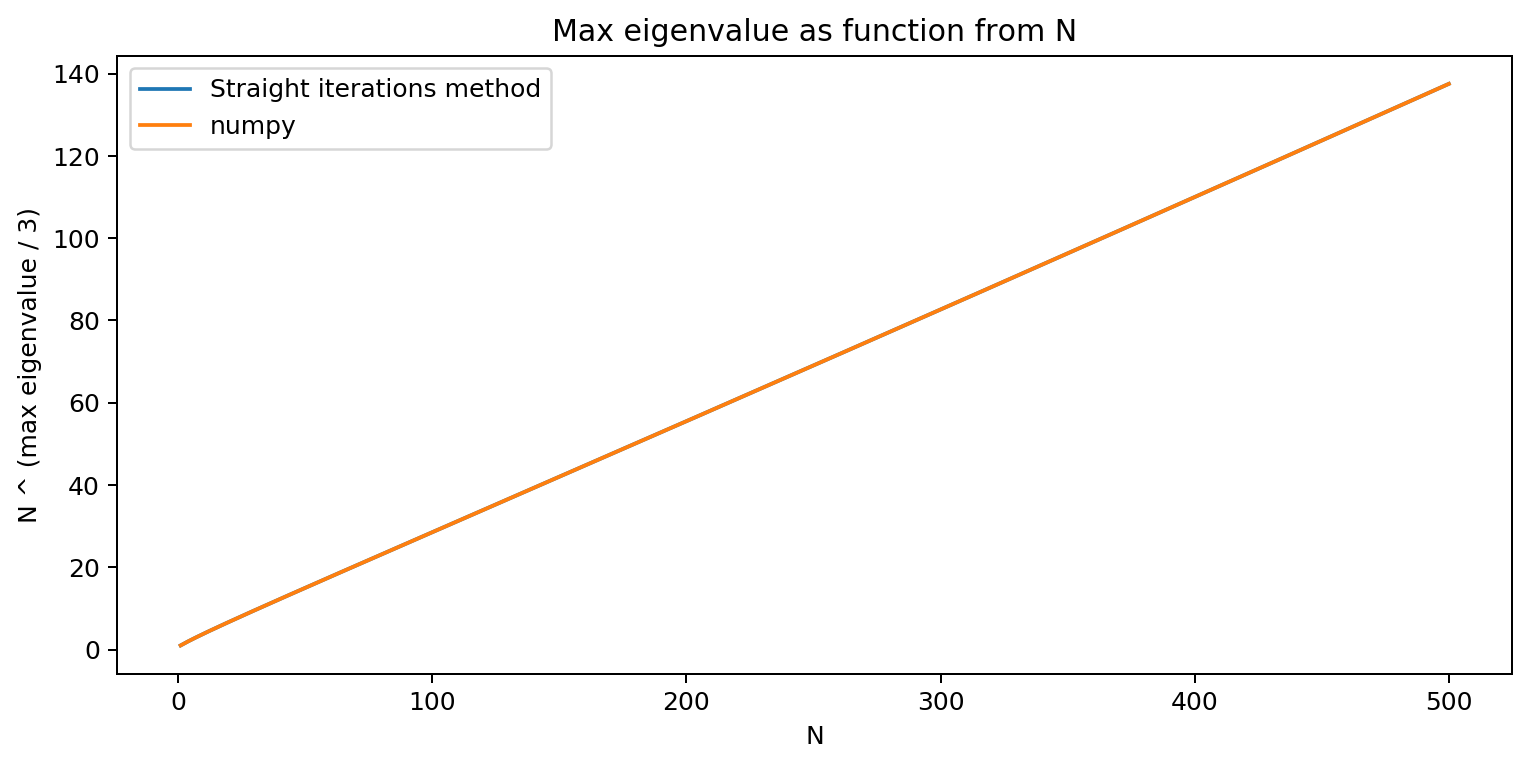

In [160]:
plt.figure(figsize=(10, 10), dpi=180)
draw_max_eig_from_n(get_max_eigenvalue_straight_iterations)
draw_max_eig_from_n(get_max_eigenvalue_numpy)
plt.title("Max eigenvalue as function from N")
plt.legend(("Straight iterations method", "numpy"))
plt.show()

Как видим графики совпадают, значит метод дает примерно такие же результаты, как и реализация numpy. 

Также масштаб $N^{y(N) / 3}$. Получившиеся прямая проходит через: $(500; 140); (1; 1)$. Поэтому ее уравнение $y = \frac{139}{499} x + \frac{360}{499}$

$N^{\frac{y(N)}{3}} = k * N + b \Leftrightarrow \frac{y(N)}{3} log(N) = log(k * N + b) \Leftrightarrow y(N) = \frac{3log(k * N + b)}{log(N)} = \frac{3log(\frac{139}{499} N + \frac{360}{499})}{log(N)}$

Таким образом максимальное собственное число зависит от N как отношение логарифмов.

"С помощью метода итераций со сдвигом постройте минимальное собственное значение как функцию от N"

Если нас просят минимальное, то надо взять $\alpha > \lambda_1$, так как мы уже знаем зависимость макс. собственного числа, то можем взять $\alpha=N + 1$, его точно хватит, чтобы оно было больше макс. собственного числа.

In [77]:
def get_min_eigenvalue_shift(A, alpha=None, k_straight=100):
    N = A.shape[0]
    if alpha is None:
        alpha = N + 1
    A_shift = A - alpha * np.identity(N)
    return get_max_eigenvalue_straight_iterations(A_shift, k=k_straight) + alpha

def get_min_eigenvalue_numpy(A):
    return min(np.linalg.eig(A)[0])

In [60]:
A = get_A(3)
my_min_eig_shift = get_min_eigenvalue_shift(A)
np_min_eig = get_min_eigenvalue_numpy(A)
print("My implementation:            " + str(my_max_eig))
print("My implementation with shift: " + str(my_max_eig_shift))
print("Numpy:                        " + str(np_max_eig))

My implementation:            1.4083189271236543
My implementation with shift: 1.4083189271236536
Numpy:                        1.4083189271236538


Как видим сходимость действительно ускорилась, теперь при 100 итерациях (в обоих методах) у нас ошибка в меньшем разряде.

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mikhail/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


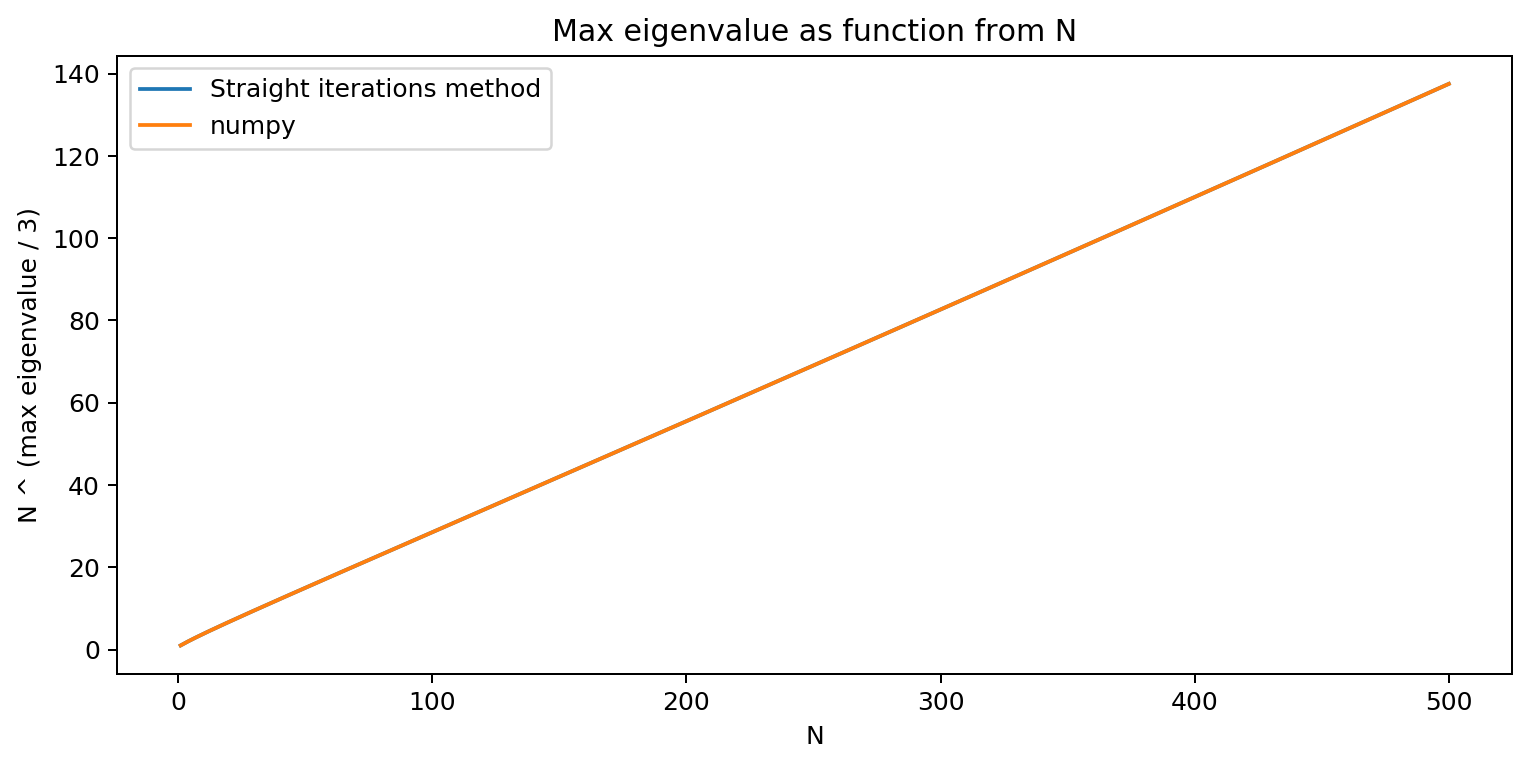

In [61]:
plt.figure(figsize=(10, 10), dpi=180)
draw_max_eig_from_n(get_max_eigenvalue_shift)
draw_max_eig_from_n(get_max_eigenvalue_numpy)
plt.title("Max eigenvalue as function from N")
plt.legend(("Straight iterations method", "numpy"))
plt.show()

Как видим, графики все те же, что и ожидалось.

Давайте посмотрим еще на разницу значений, при одинаковом количестве итераций, чтобы увидить насколько увеличилась сходимость.

In [74]:
def draw_max_difference(max_eig_generator1, max_eig_generator2, N_min=1, N_max=500):
    data_x = [N for N in range(N_min, N_max + 1)]
    data_y = [np.abs(max_eig_generator1(get_A(N)) - max_eig_generator2(get_A(N))) for N in range(N_min, N_max + 1)]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("|max_method1 - max_method2|")
    plt.xlabel("N")

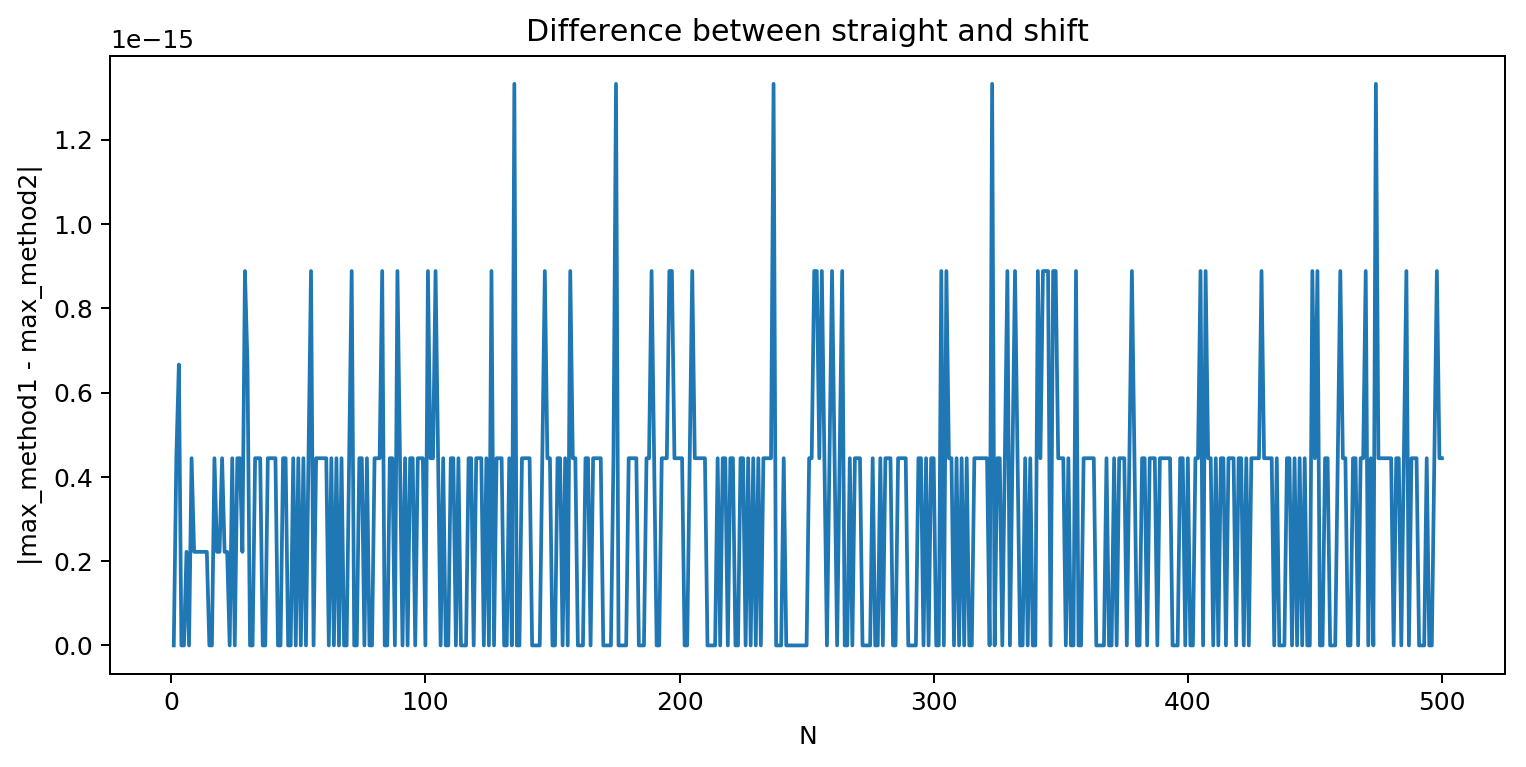

In [75]:
plt.figure(figsize=(10, 10), dpi=180)
draw_max_difference(get_max_eigenvalue_shift, get_max_eigenvalue_straight_iterations)
plt.title("Difference between straight and shift")
plt.show()

Как видим разница небольшая, порядка $10^{-15}$. Что уже очень близко к максимальной точности float64.

Чтобы удостовериться, что сдвиг ускоряет сходимость, построим графики ошибки двух методов, считая эталонным метод, реализованный в numpy.

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


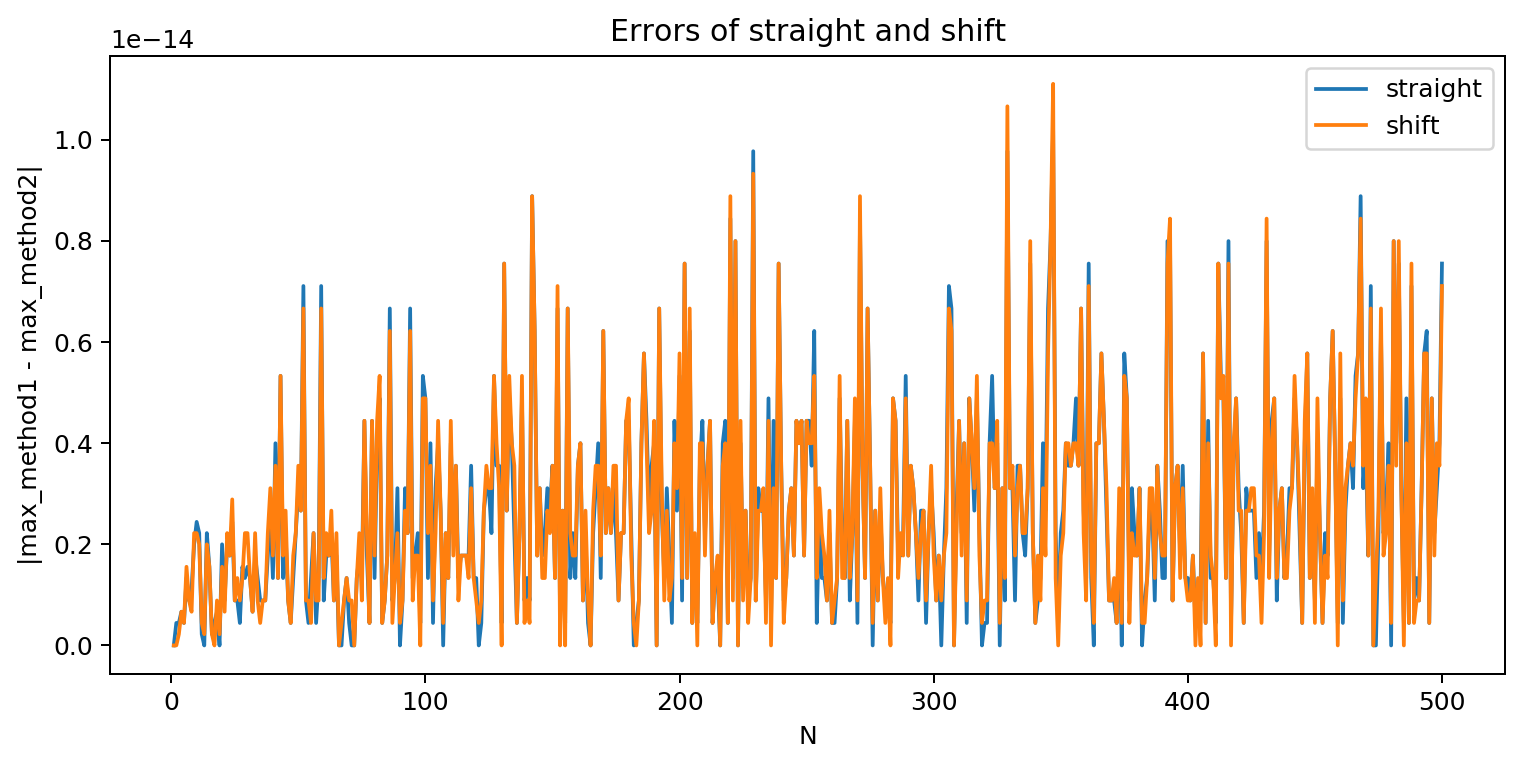

In [76]:
plt.figure(figsize=(10, 10), dpi=180)
draw_max_difference(get_max_eigenvalue_straight_iterations, get_max_eigenvalue_numpy)
draw_max_difference(get_max_eigenvalue_shift, get_max_eigenvalue_numpy)
plt.title("Errors of straight and shift")
plt.legend(("straight", "shift"))
plt.show()

Как видим иногда ускоряет, а иногда нет. Причиной этого может быть то, что распределение собственных чисел в зависимости от N изменяется немонтонно и не всегда $\alpha=0.5$ подходит для сдвига.